Importing required packages

In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

Filtering out some test participants (used to test the survey system), added dataset column and deleted "instruction" and "configHash Column"

In [2]:
# Load the CSV file
file_path = './data/prepilot-pilot-raw.csv'
df = pd.read_csv(file_path)

df.head(10)



,participantId,trialId,trialOrder,responseId,status,percentComplete,description,instruction,responsePrompt,answer,correctAnswer,responseMin,responseMax,startTime,endTime,duration,configHash
0,2033c860-b467-42e3-ab2e-19ca44e65b0a,Consent,1,id,completed,100.0,undefined,undefined,Your Prolific ID,Rahat Zaman,undefined,undefined,undefined,2024-07-31T03:26:03.202Z,2024-07-31T03:27:28.983Z,85781,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
1,2033c860-b467-42e3-ab2e-19ca44e65b0a,Consent,1,consent,completed,100.0,undefined,undefined,Do you consent to the study and wish to continue?,yes,undefined,undefined,undefined,2024-07-31T03:26:03.202Z,2024-07-31T03:27:28.983Z,85781,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
2,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 1,3,1,completed,100.0,undefined,Please answer the following questions:,What is the largest set?,Romance,Action,undefined,undefined,2024-07-31T03:48:25.846Z,2024-07-31T03:52:51.094Z,265248,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
3,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 1,3,2,completed,100.0,undefined,Please answer the following questions:,What is the largest intersection?,Empty Intersection (no sets),Empty Intersection (no sets),undefined,undefined,2024-07-31T03:48:25.846Z,2024-07-31T03:52:51.094Z,265248,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
4,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 1,3,3,completed,100.0,undefined,Please answer the following questions:,How many sets make up the largest intersection?,It is the empty intersection (no sets),It is the empty intersection (no sets),undefined,undefined,2024-07-31T03:48:25.846Z,2024-07-31T03:52:51.094Z,265248,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
5,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 2,4,1,completed,100.0,undefined,Please answer the following questions:,What is the largest set?,Adventure,Adventure,undefined,undefined,2024-07-31T03:52:51.112Z,2024-07-31T04:01:08.980Z,497868,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
6,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 2,4,2,completed,100.0,undefined,Please answer the following questions:,What is the largest intersection?,Empty Intersection (no sets),Adventure,undefined,undefined,2024-07-31T03:52:51.112Z,2024-07-31T04:01:08.980Z,497868,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
7,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 2,4,3,completed,100.0,undefined,Please answer the following questions:,How many sets make up the largest intersection?,It is the empty intersection (no sets),It is only of a single set,undefined,undefined,2024-07-31T03:52:51.112Z,2024-07-31T04:01:08.980Z,497868,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
8,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 3,5,1,completed,100.0,undefined,Please answer the following questions:,What is the largest set?,Drama,Drama,undefined,undefined,2024-07-31T04:01:08.993Z,2024-07-31T04:01:40.418Z,31425,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
9,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 3,5,2,completed,100.0,undefined,Please answer the following questions:,What is the largest intersection?,Drama,Drama,undefined,undefined,2024-07-31T04:01:08.993Z,2024-07-31T04:01:40.418Z,31425,ecdced17dc1fd86b8b83f4914646d257990133f9423074...


Adding the correct answers (was not added in first two pilots)

In [3]:
import pandas as pd

# Load the CSV file
file_path = './data/prepilot-pilot-raw.csv'
df = pd.read_csv(file_path)

# Define the correct answers for each specific trialId and responseId
correct_answers_map = {
    'Covid-Vis-Q1': {
        'voq1': '6',
        'voq2': 'Fatigue',
        'voq3': 'Anosmia,Fatigue',
        'voq4': '281',
        'voq5': 'It is the intersection of 2-3 sets',
        'voq6': 'Diverging a lot',
        'voq7': 'Yes',
        'voq8': 'Yes'
    },
    'Covid-Text-Q1': {
        'voq1': '6',
        'voq2': 'Fatigue',
        'voq3': 'Anosmia,Fatigue',
        'voq4': '281',
        'voq5': 'It is the intersection of 2-3 sets',
        'voq6': 'Diverging a lot',
        'voq7': 'Yes',
        'voq8': 'Yes'
    },
    'Covid-Both-Q1': {
        'voq1': '6',
        'voq2': 'Fatigue',
        'voq3': 'Anosmia,Fatigue',
        'voq4': '281',
        'voq5': 'It is the intersection of 2-3 sets',
        'voq6': 'Diverging a lot',
        'voq7': 'Yes',
        'voq8': 'Yes'
    },
    'Tennis-Vis-Q1': {
        'voq1': '4',
        'voq2': 'Australian',
        'voq3': 'French Open',
        'voq4': '23',
        'voq5': 'It is only of a single set',
        'voq6': 'Roughly equal',
        'voq7': 'No',
        'voq8': 'Yes'
    },
    'Tennis-Text-Q1': {
        'voq1': '4',
        'voq2': 'Australian',
        'voq3': 'French Open',
        'voq4': '23',
        'voq5': 'It is only of a single set',
        'voq6': 'Roughly equal',
        'voq7': 'No',
        'voq8': 'Yes'
    },
    'Tennis-Both-Q1': {
        'voq1': '4',
        'voq2': 'Australian',
        'voq3': 'French Open',
        'voq4': '23',
        'voq5': 'It is only of a single set',
        'voq6': 'Roughly equal',
        'voq7': 'No',
        'voq8': 'Yes'
    },
    'Organizations-Vis-Q1': {
        'voq1': '8',
        'voq2': 'UPU',
        'voq3': 'Interpol,UN,UNESCO,UPU,WHO',
        'voq4': '117',
        'voq5': 'It is the intersection of many sets',
        'voq6': 'Diverging a lot',
        'voq7': 'Yes',
        'voq8': 'No'
    },
    'Organizations-Text-Q1': {
        'voq1': '8',
        'voq2': 'UPU',
        'voq3': 'Interpol,UN,UNESCO,UPU,WHO',
        'voq4': '117',
        'voq5': 'It is the intersection of many sets',
        'voq6': 'Diverging a lot',
        'voq7': 'Yes',
        'voq8': 'No'
    },
    'Organizations-Both-Q1': {
        'voq1': '8',
        'voq2': 'UPU',
        'voq3': 'Interpol,UN,UNESCO,UPU,WHO',
        'voq4': '117',
        'voq5': 'It is the intersection of many sets',
        'voq6': 'Diverging a lot',
        'voq7': 'Yes',
        'voq8': 'No'
    }
}

# Update the correctAnswer column based on the trialId and responseId
for trial_id, responses in correct_answers_map.items():
    for response_id, correct_answer in responses.items():
        condition = (df['trialId'] == trial_id) & (df['responseId'] == response_id)
        df.loc[condition, 'correctAnswer'] = correct_answer

# Display the updated dataframe
df.head(10)  # Displaying the first 20 rows for verification


,participantId,trialId,trialOrder,responseId,status,percentComplete,description,instruction,responsePrompt,answer,correctAnswer,responseMin,responseMax,startTime,endTime,duration,configHash
0,2033c860-b467-42e3-ab2e-19ca44e65b0a,Consent,1,id,completed,100.0,undefined,undefined,Your Prolific ID,Rahat Zaman,undefined,undefined,undefined,2024-07-31T03:26:03.202Z,2024-07-31T03:27:28.983Z,85781,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
1,2033c860-b467-42e3-ab2e-19ca44e65b0a,Consent,1,consent,completed,100.0,undefined,undefined,Do you consent to the study and wish to continue?,yes,undefined,undefined,undefined,2024-07-31T03:26:03.202Z,2024-07-31T03:27:28.983Z,85781,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
2,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 1,3,1,completed,100.0,undefined,Please answer the following questions:,What is the largest set?,Romance,Action,undefined,undefined,2024-07-31T03:48:25.846Z,2024-07-31T03:52:51.094Z,265248,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
3,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 1,3,2,completed,100.0,undefined,Please answer the following questions:,What is the largest intersection?,Empty Intersection (no sets),Empty Intersection (no sets),undefined,undefined,2024-07-31T03:48:25.846Z,2024-07-31T03:52:51.094Z,265248,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
4,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 1,3,3,completed,100.0,undefined,Please answer the following questions:,How many sets make up the largest intersection?,It is the empty intersection (no sets),It is the empty intersection (no sets),undefined,undefined,2024-07-31T03:48:25.846Z,2024-07-31T03:52:51.094Z,265248,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
5,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 2,4,1,completed,100.0,undefined,Please answer the following questions:,What is the largest set?,Adventure,Adventure,undefined,undefined,2024-07-31T03:52:51.112Z,2024-07-31T04:01:08.980Z,497868,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
6,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 2,4,2,completed,100.0,undefined,Please answer the following questions:,What is the largest intersection?,Empty Intersection (no sets),Adventure,undefined,undefined,2024-07-31T03:52:51.112Z,2024-07-31T04:01:08.980Z,497868,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
7,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 2,4,3,completed,100.0,undefined,Please answer the following questions:,How many sets make up the largest intersection?,It is the empty intersection (no sets),It is only of a single set,undefined,undefined,2024-07-31T03:52:51.112Z,2024-07-31T04:01:08.980Z,497868,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
8,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 3,5,1,completed,100.0,undefined,Please answer the following questions:,What is the largest set?,Drama,Drama,undefined,undefined,2024-07-31T04:01:08.993Z,2024-07-31T04:01:40.418Z,31425,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
9,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 3,5,2,completed,100.0,undefined,Please answer the following questions:,What is the largest intersection?,Drama,Drama,undefined,undefined,2024-07-31T04:01:08.993Z,2024-07-31T04:01:40.418Z,31425,ecdced17dc1fd86b8b83f4914646d257990133f9423074...


Add a field named isCorrectlyAnswered

In [4]:
# List of factual trialIds
factual_trial_ids = [
    'Covid-Vis-Q1', 'Covid-Text-Q1', 'Covid-Both-Q1',
    'Tennis-Vis-Q1', 'Tennis-Text-Q1', 'Tennis-Both-Q1',
    'Organizations-Vis-Q1', 'Organizations-Text-Q1', 'Organizations-Both-Q1'
]

# List of factual responseIds (for simplicity, assuming they are the same across all these trialIds)
factual_response_ids = ['voq1', 'voq2', 'voq3', 'voq4', 'voq5', 'voq6', 'voq7', 'voq8']

training_trial_ids = ['Training 1', 'Training 2', 'Training 3']
training_response_ids = ['1', '2', '3']



# Function to determine if the answer is correct or should be marked as "undefined"
def is_correctly_answered(row):
    if (row['trialId'] in factual_trial_ids and row['responseId'] in factual_response_ids) or \
       (row['trialId'] in training_trial_ids and row['responseId'] in training_response_ids):
        return row['answer'] == row['correctAnswer']
    else:
        return "undefined"

# Add the isCorrectlyAnswered column
df['isCorrectlyAnswered'] = df.apply(is_correctly_answered, axis=1)

# Reorder columns to place isCorrectlyAnswered right after correctAnswer
cols = df.columns.tolist()
correct_answer_index = cols.index('correctAnswer')
cols.insert(correct_answer_index + 1, cols.pop(cols.index('isCorrectlyAnswered')))
df = df[cols]

df.head(10)  # Displaying the first 50 rows for verification

,participantId,trialId,trialOrder,responseId,status,percentComplete,description,instruction,responsePrompt,answer,correctAnswer,isCorrectlyAnswered,responseMin,responseMax,startTime,endTime,duration,configHash
0,2033c860-b467-42e3-ab2e-19ca44e65b0a,Consent,1,id,completed,100.0,undefined,undefined,Your Prolific ID,Rahat Zaman,undefined,undefined,undefined,undefined,2024-07-31T03:26:03.202Z,2024-07-31T03:27:28.983Z,85781,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
1,2033c860-b467-42e3-ab2e-19ca44e65b0a,Consent,1,consent,completed,100.0,undefined,undefined,Do you consent to the study and wish to continue?,yes,undefined,undefined,undefined,undefined,2024-07-31T03:26:03.202Z,2024-07-31T03:27:28.983Z,85781,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
2,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 1,3,1,completed,100.0,undefined,Please answer the following questions:,What is the largest set?,Romance,Action,False,undefined,undefined,2024-07-31T03:48:25.846Z,2024-07-31T03:52:51.094Z,265248,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
3,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 1,3,2,completed,100.0,undefined,Please answer the following questions:,What is the largest intersection?,Empty Intersection (no sets),Empty Intersection (no sets),True,undefined,undefined,2024-07-31T03:48:25.846Z,2024-07-31T03:52:51.094Z,265248,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
4,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 1,3,3,completed,100.0,undefined,Please answer the following questions:,How many sets make up the largest intersection?,It is the empty intersection (no sets),It is the empty intersection (no sets),True,undefined,undefined,2024-07-31T03:48:25.846Z,2024-07-31T03:52:51.094Z,265248,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
5,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 2,4,1,completed,100.0,undefined,Please answer the following questions:,What is the largest set?,Adventure,Adventure,True,undefined,undefined,2024-07-31T03:52:51.112Z,2024-07-31T04:01:08.980Z,497868,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
6,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 2,4,2,completed,100.0,undefined,Please answer the following questions:,What is the largest intersection?,Empty Intersection (no sets),Adventure,False,undefined,undefined,2024-07-31T03:52:51.112Z,2024-07-31T04:01:08.980Z,497868,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
7,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 2,4,3,completed,100.0,undefined,Please answer the following questions:,How many sets make up the largest intersection?,It is the empty intersection (no sets),It is only of a single set,False,undefined,undefined,2024-07-31T03:52:51.112Z,2024-07-31T04:01:08.980Z,497868,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
8,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 3,5,1,completed,100.0,undefined,Please answer the following questions:,What is the largest set?,Drama,Drama,True,undefined,undefined,2024-07-31T04:01:08.993Z,2024-07-31T04:01:40.418Z,31425,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
9,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 3,5,2,completed,100.0,undefined,Please answer the following questions:,What is the largest intersection?,Drama,Drama,True,undefined,undefined,2024-07-31T04:01:08.993Z,2024-07-31T04:01:40.418Z,31425,ecdced17dc1fd86b8b83f4914646d257990133f9423074...


Filtering out the completed studies (removing the pending and rejected ones)

In [5]:
# Filter rows where 'Status' is 'completed'
filtered_df = df[df['status'] == 'completed']

# Define the participantId to be removed
participants_to_remove = ['e78b4a59-2483-4f3b-a4b1-e046e06e1e26', '66a13fdf279c038ba8aa5ae6']

# Filter out the rows with the specified participantId
filtered_df = filtered_df[~filtered_df['participantId'].isin(participants_to_remove)]

# Add the dataset column based on the conditions
def determine_dataset(trial_id):
    if 'Covid' in trial_id:
        return 'Covid Symptoms'
    elif 'Tennis' in trial_id:
        return 'Tennis Grand Slam Winners'
    elif 'Organizations' in trial_id:
        return 'International Organizations'
    elif 'Training' in trial_id:
        return 'Movie Genres'
    else:
        return 'Undefined'

filtered_df['dataset'] = filtered_df['trialId'].apply(determine_dataset)

# Delete the specified columns
filtered_df = filtered_df.drop(columns=['instruction', 'configHash'])

# Save the filtered data to a new CSV file
new_file_path = './data/prep-pilot.csv'
filtered_df.to_csv(new_file_path, index=False)

print(f"Filtered data saved to: {new_file_path}")


Filtered data saved to: ./data/prep-pilot.csv


(Ignore now) Separating three conditions (Vis, Text, Both) in three different files 

In [101]:
# Define the middle part of the conditions
conditions = ['Text', 'Both', 'Vis', 'Survey']

# Generate separate CSV files for each condition
for condition in conditions:
    # Filter the DataFrame based on the presence of the condition in 'trialId'
    condition_df = filtered_df[filtered_df['trialId'].str.contains(condition)]
    
    # Save the filtered data to a new CSV file
    new_file_path = f'./data/{condition}_data.csv'
    condition_df.to_csv(new_file_path, index=False)
    
    print(f"Filtered data for condition '{condition}' saved to: {new_file_path}")

Filtered data for condition 'Text' saved to: ./data/Text_data.csv
Filtered data for condition 'Both' saved to: ./data/Both_data.csv
Filtered data for condition 'Vis' saved to: ./data/Vis_data.csv
Filtered data for condition 'Survey' saved to: ./data/Survey_data.csv


Counting post survey preferences and effectiveness

In [6]:


# Load the CSV data
data = pd.read_csv('./data/Survey_data.csv')

# Filter relevant columns for analysis
columns_of_interest = ['participantId', 'trialId', 'responseId', 'responsePrompt', 'answer']
filtered_data = data[columns_of_interest]

# Analyze responses to "Which presentation modality did you find most effective?"
most_effective = filtered_data[filtered_data['responsePrompt'] == 'Which presentation modality did you find most effective?']['answer']

# Analyze responses to "Which condition did you find the least effective?"
least_effective = filtered_data[filtered_data['responsePrompt'] == 'Which condition did you find the least effective?']['answer']

# Analyze responses to "If you were to receive information in the future, which format would you prefer?"
preferred_format = filtered_data[filtered_data['responsePrompt'] == 'If you were to receive information in the future, which format would you prefer?']['answer']

# Create counters for each question
most_effective_counts = Counter(most_effective)
least_effective_counts = Counter(least_effective)
preferred_format_counts = Counter(preferred_format)

most_effective_counts, least_effective_counts, preferred_format_counts


(Counter({'Text and Visualization Combined': 6, 'Just Visualization': 4}),
 Counter({'Just Text Description': 6, 'Just Visualization': 4}),
 Counter({'Text and Visualization Combined': 7, 'Just Visualization': 3}))

Plotting the result for pereferences and the effectiveness

Most Effective: [4, 6, 0]
Least Effective: [4, 0, 6]
Preferred Format: [3, 7, 0]


/var/folders/t8/_mskc89n2_g3fy90ggktqfxm0000gn/T/ipykernel_53130/2735830496.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted[df_melted['Category'] == title], x='Condition', y='Count', ax=ax, palette='viridis', ci=None)
/var/folders/t8/_mskc89n2_g3fy90ggktqfxm0000gn/T/ipykernel_53130/2735830496.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_melted[df_melted['Category'] == title], x='Condition', y='Count', ax=ax, palette='viridis', ci=None)
/var/folders/t8/_mskc89n2_g3fy90ggktqfxm0000gn/T/ipykernel_53130/2735830496.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=8)
/var/folders/t8/_mskc

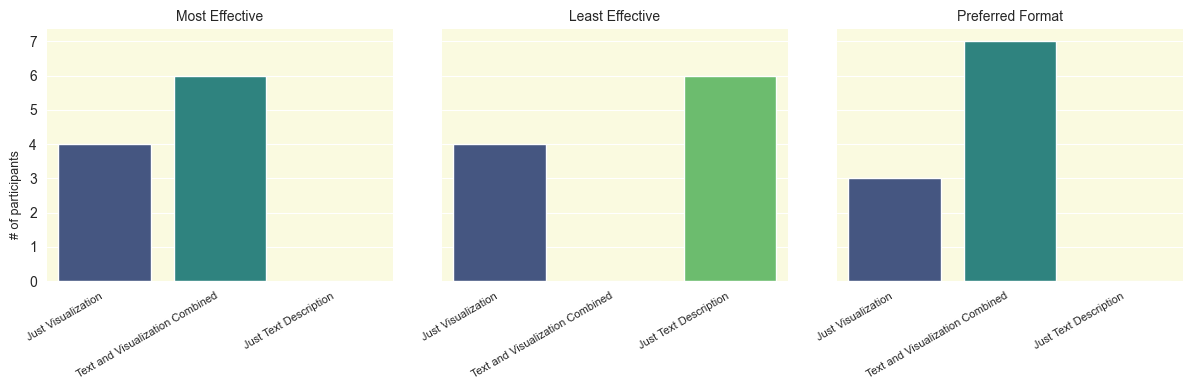

In [7]:
# Example DataFrame

conditions = ['Just Visualization', 'Text and Visualization Combined', 'Just Text Description']
# Initialize lists for counts
most_effective_list = [most_effective_counts.get(cond, 0) for cond in conditions]
least_effective_list = [least_effective_counts.get(cond, 0) for cond in conditions]
preferred_format_list = [preferred_format_counts.get(cond, 0) for cond in conditions]

# Print results to verify
print('Most Effective:', most_effective_list)
print('Least Effective:', least_effective_list)
print('Preferred Format:', preferred_format_list)

data = {
    'Condition': conditions,
    'Most Effective': most_effective_list,
    'Least Effective': least_effective_list,
    'Preferred Format': preferred_format_list
}
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars='Condition', var_name='Category', value_name='Count')

# Seaborn settings
# sns.set_style("whitegrid")
sns.set_style("whitegrid", {'axes.facecolor': (0.98, 0.98, 0.88), 'grid.color': 'white'})

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True, facecolor='white')

# Define titles
titles = ['Most Effective', 'Least Effective', 'Preferred Format']

# Plotting
palette = sns.color_palette("husl", len(conditions)) 
for ax, title in zip(axs, titles):
    sns.barplot(data=df_melted[df_melted['Category'] == title], x='Condition', y='Count', ax=ax, palette='viridis', ci=None)
    ax.set_title(title, fontsize=10)
    ax.set_xlabel('')
    # ax.set_ylabel('# of participants', fontsize=8)
    ax.set_ylabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=8)
    ax.set_facecolor((0.98, 0.98, 0.88))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)


# Set common y-label
fig.text(0.01, 0.5, '# of participants', va='center', rotation='vertical', fontsize=9)

# # Remove gridlines
# for ax in axs:
#     ax.grid(False)

fig.savefig('./figures/effectiveness-analysis.pdf', dpi=500, bbox_inches='tight')

plt.tight_layout()
plt.show()



In [87]:
# Load the main CSV file
file_path = './data/prep-pilot.csv'
df = pd.read_csv(file_path)

# Define the columns to display
columns_of_interest = ['participantId','trialId', 'responseId', 'responsePrompt', 'answer', 'correctAnswer', 'dataset']
ans_df = df[columns_of_interest]

# Display the filtered dataframe
ans_df.head()


,participantId,trialId,responseId,responsePrompt,answer,correctAnswer,dataset
0,2033c860-b467-42e3-ab2e-19ca44e65b0a,Consent,id,Your Prolific ID,Rahat Zaman,undefined,Undefined
1,2033c860-b467-42e3-ab2e-19ca44e65b0a,Consent,consent,Do you consent to the study and wish to continue?,yes,undefined,Undefined
2,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 1,1,What is the largest set?,Romance,Action,Movie Genres
3,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 1,2,What is the largest intersection?,Empty Intersection (no sets),Empty Intersection (no sets),Movie Genres
4,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 1,3,How many sets make up the largest intersection?,It is the empty intersection (no sets),It is the empty intersection (no sets),Movie Genres


Percentage of Answering Correcty (based on Text, Both and Vis for each dataset (covid-text-Q1, covid-vis-Q1, etc. and training dataset)

In [104]:
# Load the data from prep-pilot.csv
file_path = './data/prep-pilot.csv'
df = pd.read_csv(file_path)

# Define the trialIds of interest
trial_ids_of_interest = [
    'Training 1', 'Training 2', 'Training 3',
    'Covid-Vis-Q1', 'Covid-Text-Q1', 'Covid-Both-Q1',
    'Tennis-Vis-Q1', 'Tennis-Text-Q1', 'Tennis-Both-Q1',
    'Organizations-Vis-Q1', 'Organizations-Text-Q1', 'Organizations-Both-Q1'
]

# Filter the dataframe to include only rows with the specified trialIds
dataset_df = df[df['trialId'].isin(trial_ids_of_interest)]

print("Only the below trialIds have factual questions:")
print(dataset_df['trialId'].value_counts())
dataset_df.head(10)

# Convert 'isCorrectlyAnswered' from string to boolean
dataset_df['isCorrectlyAnswered'] = dataset_df['isCorrectlyAnswered'].apply(lambda x: True if x == 'True' else False if x == 'False' else x)

# Ensure isCorrectlyAnswered is boolean and filter out non-boolean values
filterCorrectAnswer_df = dataset_df[dataset_df['isCorrectlyAnswered'].isin([True, False])]
filterCorrectAnswer_df.head(10)

# print(filterCorrectAnswer_df['isCorrectlyAnswered'].value_counts())

# Calculate the percentage of correctly answered trials for each trialId
percentage_correct_by_trialid = filterCorrectAnswer_df.groupby('trialId')['isCorrectlyAnswered'].mean() * 100

# Display the results
print("Percentage of correctly answered trials for each trialId of having factual questions:")
print(percentage_correct_by_trialid)


Only the below trialIds have factual questions:
trialId
Covid-Text-Q1            40
Organizations-Vis-Q1     40
Organizations-Both-Q1    32
Tennis-Vis-Q1            32
Covid-Both-Q1            32
Tennis-Text-Q1           32
Training 1               30
Training 2               30
Training 3               30
Tennis-Both-Q1           16
Organizations-Text-Q1     8
Covid-Vis-Q1              8
Name: count, dtype: int64
Percentage of correctly answered trials for each trialId of having factual questions:
trialId
Covid-Both-Q1             62.500000
Covid-Text-Q1             87.500000
Covid-Vis-Q1             100.000000
Organizations-Both-Q1     81.250000
Organizations-Text-Q1     37.500000
Organizations-Vis-Q1      72.500000
Tennis-Both-Q1            93.750000
Tennis-Text-Q1            71.875000
Tennis-Vis-Q1             53.125000
Training 1                50.000000
Training 2                70.000000
Training 3                63.333333
Name: isCorrectlyAnswered, dtype: float64


/var/folders/t8/_mskc89n2_g3fy90ggktqfxm0000gn/T/ipykernel_40777/1414715649.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['isCorrectlyAnswered'] = dataset_df['isCorrectlyAnswered'].apply(lambda x: True if x == 'True' else False if x == 'False' else x)


Percentage of Answering Correcty (based on each Visual Contents - Vis, Text or Both)

In [105]:
# Create a new column to identify the visual content type (VIS, BOTH, Text)
def get_visual_content_type(trialId):
    if 'Vis' in trialId:
        return 'VIS'
    elif 'Both' in trialId:
        return 'BOTH'
    elif 'Text' in trialId:
        return 'TEXT'
    else:
        return 'TRAININGS'
    

filterCorrectAnswer_df['VisualContentType'] = filterCorrectAnswer_df['trialId'].apply(get_visual_content_type)

# Calculate the percentage of correctly answered trials for each Visual Content Type
percentage_correct_by_visual_content = filterCorrectAnswer_df.groupby('VisualContentType')['isCorrectlyAnswered'].mean() * 100

# Display the results
print("Percentage of correctly answered cumulatively for each Visual Content Type:")
print(percentage_correct_by_visual_content)

Percentage of correctly answered cumulatively for each Visual Content Type:
VisualContentType
BOTH         76.250000
TEXT         76.250000
TRAININGS    61.111111
VIS          67.500000
Name: isCorrectlyAnswered, dtype: float64


Percentage of Answering Correcty (based on datasets)

In [106]:

# Calculate the percentage of correctly answered trials for each dataset
percentage_correct_by_dataset = filterCorrectAnswer_df.groupby('dataset')['isCorrectlyAnswered'].mean() * 100

# Display the result
print("Percentage of correctly answered answer cumulatively for each dataset (of having factual questions only):")
print(percentage_correct_by_dataset)



Percentage of correctly answered answer cumulatively for each dataset (of having factual questions only):
dataset
Covid Symptoms                 78.750000
International Organizations    72.500000
Movie Genres                   61.111111
Tennis Grand Slam Winners      68.750000
Name: isCorrectlyAnswered, dtype: float64


In [5]:


# Load the data from prep-pilot.csv
file_path = './data/prep-pilot.csv'
df = pd.read_csv(file_path)

# Define the Q3 trialIds of interest
q3_trial_ids = [
    'Covid-Vis-Q3', 'Covid-Text-Q3', 'Covid-Both-Q3',
    'Tennis-Vis-Q3', 'Tennis-Text-Q3', 'Tennis-Both-Q3',
    'Organizations-Vis-Q3', 'Organizations-Text-Q3', 'Organizations-Both-Q3'
]

# Filter the dataframe to include only rows with the specified Q3 trialIds
q3_df = df[df['trialId'].isin(q3_trial_ids)]

# Print the answers for all the Q3 trialIds
print("Answers for all Q3 trialIds:")
pd.set_option('display.max_colwidth', None)
(q3_df[['answer']])


Answers for all Q3 trialIds:


,answer
22,"I am not sure if this description is complete, meaning you cannot create the complete visualization just from this description. Also, it is very hard to tell the size of empty intersection from just the set sizes and top 5 intersection sizes."
34,"Well, it took like 5% of time taken than the previous task with only text description. I didn't read the description of this visualization at all."
46,"It is same as the previous task. I was confidently answering the questions, and the task was very easy."
78,It seems easy to follow along with the numbers and titles; putting the description in a separate section with the title helps a lot.
90,"To answer this, I mostly used the charts on the left. I barely look at the description on the right."
102,"This has relatively fewer data elements, which makes it easy to find the answers."
134,set sizes are different
146,plot is sorted in decending order
158,chart shows outcome
190,Fatigue was the most common Covid symptom.


(Ignore) Heatmap generation

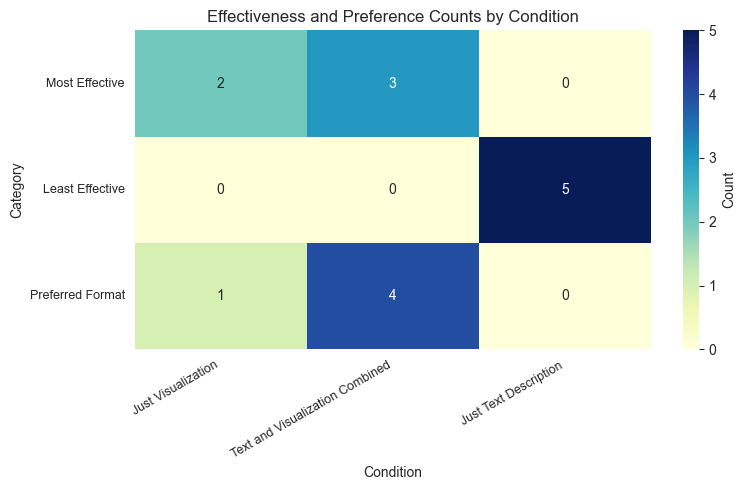

In [30]:
# Prepare data for heatmap
heatmap_data = df.set_index('Condition').T

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap='YlGnBu', cbar_kws={'label': 'Count'})

# Set titles and labels
plt.title('Effectiveness and Preference Counts by Condition', fontsize=12)
plt.xlabel('Condition', fontsize=10)
plt.ylabel('Category', fontsize=10)

plt.xticks(rotation=30, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)

plt.tight_layout()
plt.show()